In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('disease.csv')
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


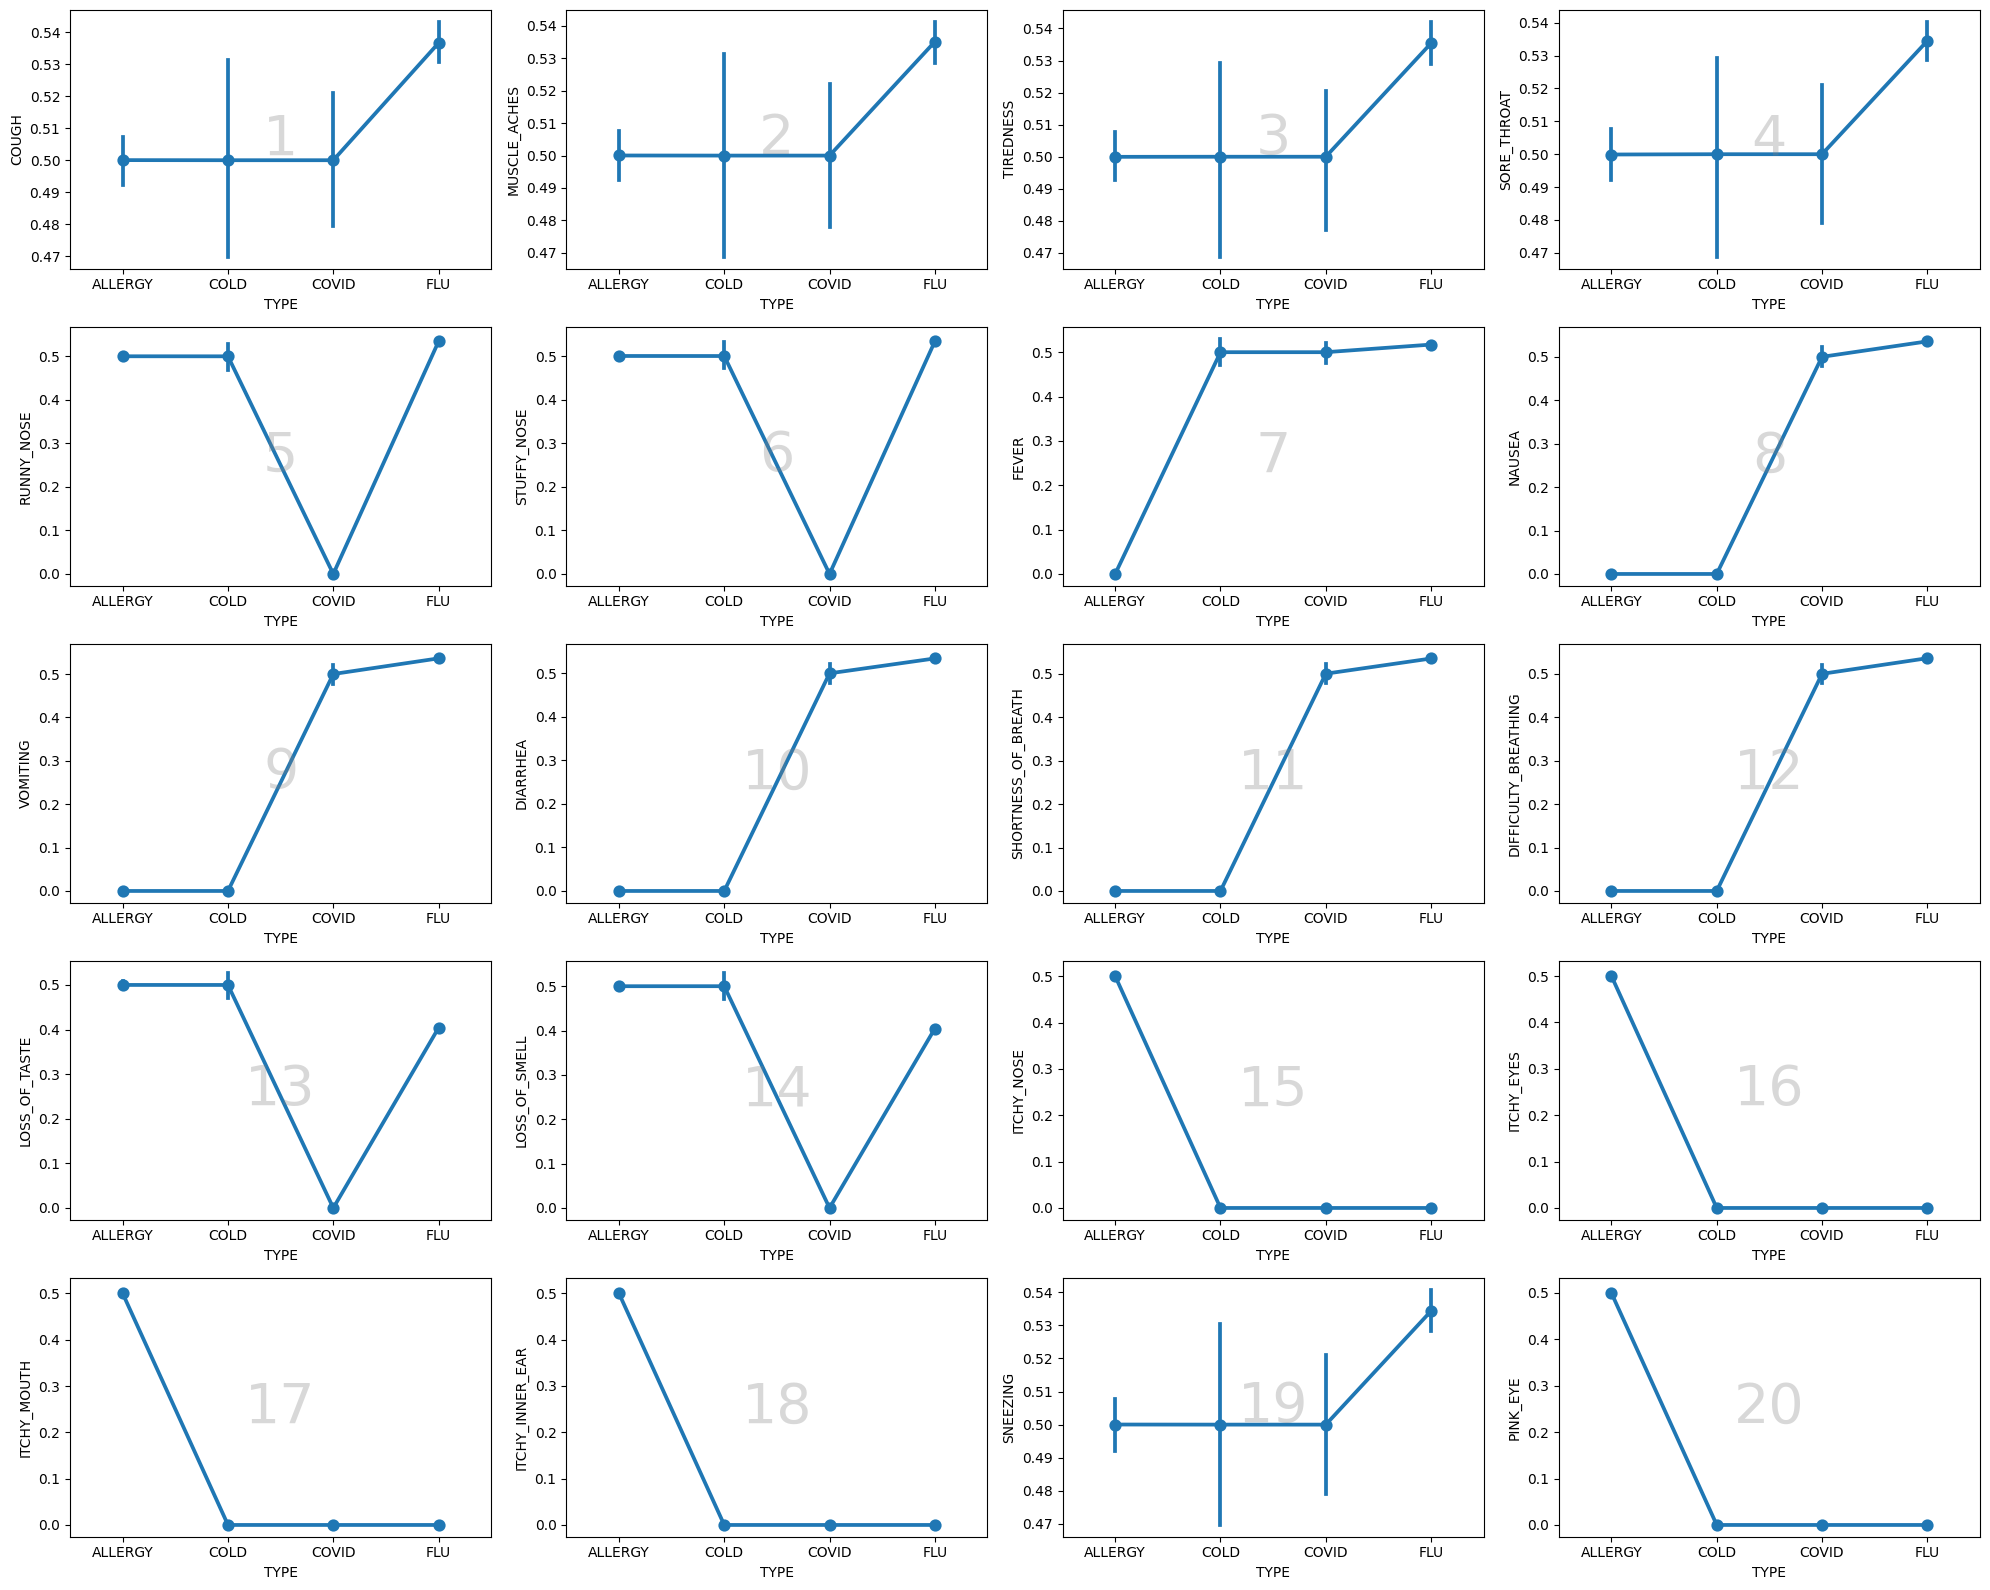

In [25]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize = (20, 16))
cols = df.columns[:-1]
for i in range(5):
    for j in range(4):
        sns.pointplot(data = df, x = 'TYPE', y = df[cols[i*4 + j]], ax = ax[i][j])
        plot_number = i * 4 + j + 1
        ax[i][j].text(0.5, 0.5, str(plot_number), transform=ax[i][j].transAxes, 
                      fontsize=40, color='gray', alpha=0.3, 
                      ha='center', va='center')
plt.tight_layout()
plt.show()

Results derived from the above plot...
- **Itchiness (itchy_nose, itchy_eyes, itchy_mouth, itchy_inner_ear)**
  - Unique to allergy
  - Represented in plots 15, 16

- **Pink eye**
  - Unique to allergy
  - Represented in plot 20

- **Nausea, vomiting, diarrhea, shortness of breath, difficulty breathing**
  - Scarce among allergy and cold
  - Present in 50% of cases with COVID-19 or flu

- **Loss of taste, loss of smell, runny nose, stuffy nose**
  - Common among all diseases (50% of cases)
  - Less than 5% of cases in COVID-19

- **Sneezing, cough, muscle_aches, sore_throat, tenderness**
  - These symptoms are common among all the diseases (50% cases) and hence cannot make a confident decision

Another important aspect is that, no disease has mean centered above 0.54, meaning only 54% of the cases possess these symptoms. The is the main reason why conventional multiclass classifiers perform very bad for this dataset.

In [ ]:
df[df['TYPE'] == 'FLU']['COUGH'].value_counts()